In [3]:
import numpy as np
import pandas as pd

In [4]:
data=pd.read_csv('/content/Social_Network_Ads (1).csv')

In [5]:
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
import seaborn as sns

In [9]:
data=pd.get_dummies(data)

<Axes: >

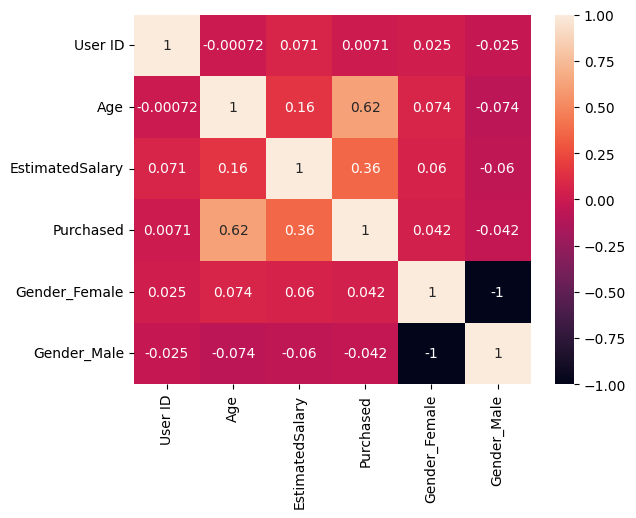

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
data = data.drop(columns=['User ID'])

In [12]:
X = data.drop('Purchased', axis=1)  # Features
y = data['Purchased']  # Target variable

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X ,y , test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy :{accuracy}')

Accuracy :0.8875


In [20]:
import pickle
with open('model_socialnetwork.pkl','wb') as model_file:
  pickle.dump(clf,model_file)
